In [1]:
import cv2  # OpenCV
import numpy as np  # NumPy
from matplotlib import pyplot as plt  # Matplotlib


def get_pixel(img, center, x, y):
    new_value = 0
    try:
        if img[x][y] >= center:
            new_value = 1
    except:
        pass
    return new_value

In [2]:
def lbp_calculated_pixel(img, x, y):
    '''
    Format : 
    64 | 128 | 1
    ----------------
    32 | 0 | 2
    ----------------
    16 | 8 | 4 
    '''
    center = img[x][y]
    val_ar = []
    val_ar.append(get_pixel(img, center, x-1, y+1)) # top_right
    val_ar.append(get_pixel(img, center, x, y+1)) # right
    val_ar.append(get_pixel(img, center, x+1, y+1)) # bottom_right
    val_ar.append(get_pixel(img, center, x+1, y)) # bottom
    val_ar.append(get_pixel(img, center, x+1, y-1)) # bottom_left
    val_ar.append(get_pixel(img, center, x, y-1)) # left
    val_ar.append(get_pixel(img, center, x-1, y-1)) # top_left
    val_ar.append(get_pixel(img, center, x-1, y)) # top
    
    power_val = [1, 2, 4, 8, 16, 32, 64, 128]
    val = 0
    for i in range(len(val_ar)):
         val += val_ar[i] * power_val[i]
    return val 

In [3]:
def show_output(output_list):
    output_list_len = len(output_list)
    figure = plt.figure(figsize=(20, 6))
    for i in range(output_list_len):
        current_dict = output_list[i]
        current_img = current_dict["img"]
        current_xlabel = current_dict["xlabel"]
        current_ylabel = current_dict["ylabel"]
        current_xtick = current_dict["xtick"]
        current_ytick = current_dict["ytick"]
        current_title = current_dict["title"]
        current_type = current_dict["type"]
        current_plot = figure.add_subplot(1, output_list_len, i + 1)
        if current_type == "gray":
            current_plot.imshow(current_img, cmap=plt.get_cmap('gray'))
            current_plot.set_title(current_title)
            current_plot.set_xticks(current_xtick)
            current_plot.set_yticks(current_ytick)
            current_plot.set_xlabel(current_xlabel)
            current_plot.set_ylabel(current_ylabel)
        elif current_type == "histogram":
            current_plot.plot(current_img, color="black")
            current_plot.set_xlim([0, 260])
            current_plot.set_title(current_title)
            current_plot.set_xlabel(current_xlabel)
            current_plot.set_ylabel(current_ylabel)
            ytick_list = [int(i) for i in current_plot.get_yticks()]
            current_plot.set_yticklabels(ytick_list, rotation=90)
        elif current_type == "normal":
            current_plot.imshow(current_img)
            current_plot.set_title(current_title)
            current_plot.set_xticks(current_xtick)
            current_plot.set_yticks(current_ytick)
            current_plot.set_xlabel(current_xlabel)
            current_plot.set_ylabel(current_ylabel)
    plt.show()

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def lbp_calculated_pixel(img, i, j):
    center = img[i, j]
    lbp = 0
    power_val = [1, 2, 4, 8, 16, 32, 64, 128]
    pixels = [img[i-1, j-1], img[i-1, j], img[i-1, j+1], img[i, j+1], img[i+1, j+1], img[i+1, j], img[i+1, j-1], img[i, j-1]]
    for k in range(8):
        if pixels[k] >= center:
            lbp += power_val[k]
    return lbp

def show_output(output_list):
    fig = plt.figure(figsize=(12, 8))
    for i, item in enumerate(output_list):
        img = item["img"]
        xlabel = item["xlabel"]
        ylabel = item["ylabel"]
        xtick = item["xtick"]
        ytick = item["ytick"]
        title = item["title"]
        img_type = item["type"]

        ax = fig.add_subplot(2, 2, i+1)
        if img_type == "histogram":
            ax.plot(img, color='black')
            ax.set_xlim([0, 256])
            ax.set_ylim([0, np.max(img)])
        else:
            ax.imshow(img, cmap='gray')

        ax.set_xlabel(xlabel)
        ax.set_ylabel(ylabel)
        ax.set_title(title)
        ax.set_xticks(xtick)
        ax.set_yticks(ytick)

    plt.tight_layout()
    plt.show()

image_file = 'trans.jpeg'
img_bgr = cv2.imread(image_file)

if img_bgr is not None:
    height, width, channel = img_bgr.shape
    img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)

    img_lbp = np.zeros((height, width), np.uint8)

    for i in range(height):
        for j in range(width):
            img_lbp[i, j] = lbp_calculated_pixel(img_gray, i, j)

    hist_lbp = cv2.calcHist([img_lbp], [0], None, [256], [0, 256])

    output_list = []
    output_list.append({"img": cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB),
                        "xlabel": "",
                        "ylabel": "",
                        "xtick": None,
                        "ytick": None,
                        "title": "Normal Image",
                        "type": "normal"
                        })
    output_list.append({"img": img_gray,
                        "xlabel": "",
                        "ylabel": "",
                        "xtick": None,
                        "ytick": None,
                        "title": "Gray Image",
                        "type": "gray"
                        })
    output_list.append({"img": img_lbp,
                        "xlabel": "",
                        "ylabel": "",
                        "xtick": None,
                        "ytick": None,
                        "title": "LBP Image",
                        "type": "gray"
                        })
    output_list.append({"img": hist_lbp,
                        "xlabel": "Bins",
                        "ylabel": "Number of pixels",
                        "xtick": None,
                        "ytick": None,
                        "title": "Histogram(LBP)",
                        "type": "histogram"
                        })
    show_output(output_list)

    cv2.waitKey(0)
    cv2.destroyAllWindows()

print("LBP Program selesai")



LBP Program selesai


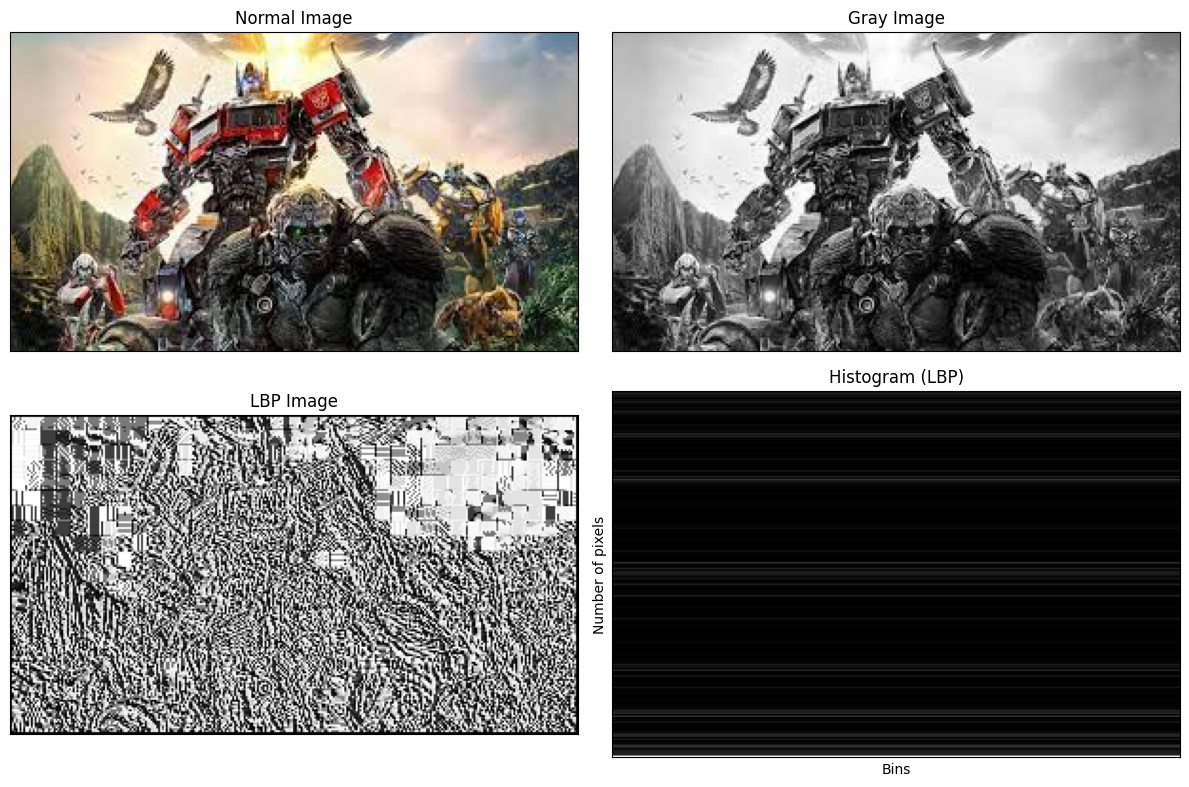

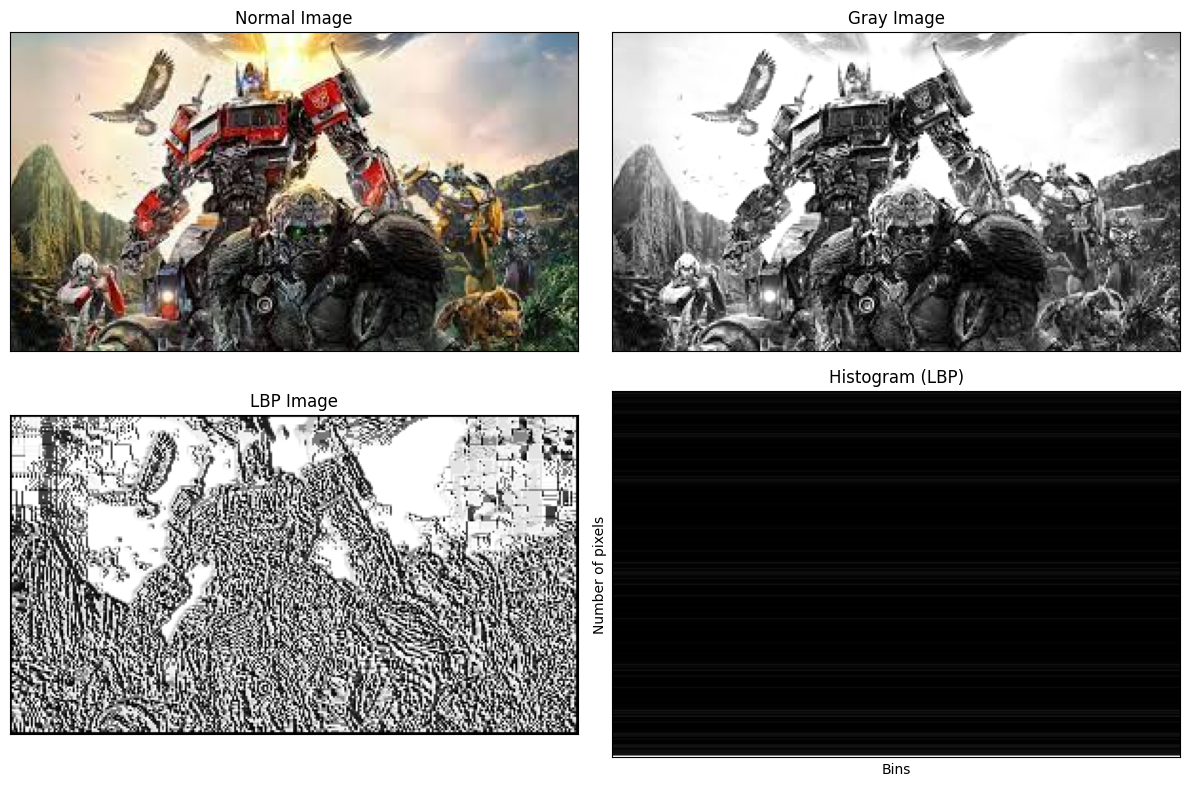

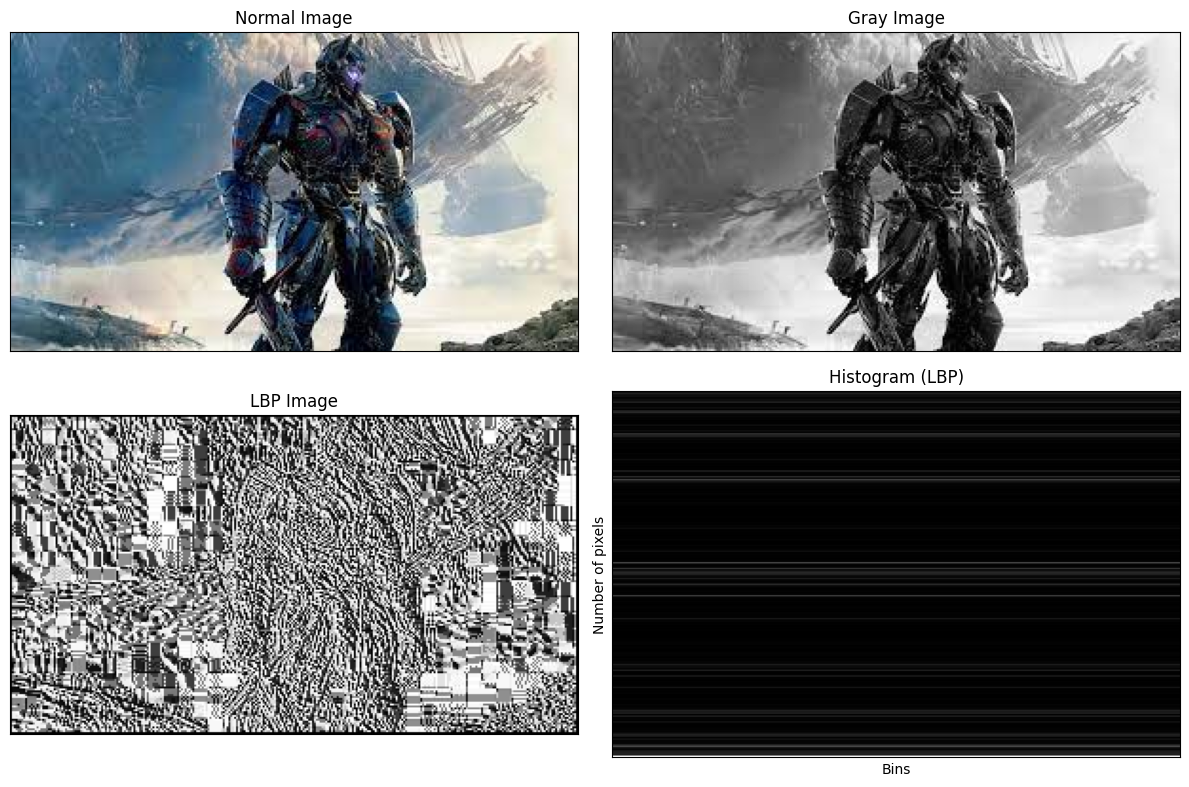

LBP Program selesai


In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def brighter(nilai, img):
    img_b = np.zeros((height, width, 3), np.uint8)
    for y in range(0, height):
        for x in range(0, width):
            red = img[y][x][2] + nilai
            green = img[y][x][1] + nilai
            blue = img[y][x][0] + nilai
            if red > 255:
                red = 255
            if red < 0:
                red = 0
            if green > 255:
                green = 255
            if green < 0:
                green = 0
            if blue > 255:
                blue = 255
            if blue < 0:
                blue = 0
            img_b[y][x] = (red, green, blue)
    return img_b

def lbp_calculated_pixel(img, i, j):
    center = img[i, j]
    lbp = 0
    power_val = [1, 2, 4, 8, 16, 32, 64, 128]
    height, width = img.shape
    pixels = [img[i-1, j-1], img[i-1, j], img[i-1, j+1], img[i, j+1], img[i+1, j+1], img[i+1, j], img[i+1, j-1], img[i, j-1]]
    for k in range(8):
        if pixels[k] >= center:
            lbp += power_val[k]
    return lbp

def show_output(output_list):
    fig = plt.figure(figsize=(12, 8))
    for i, item in enumerate(output_list):
        img = item["img"]
        xlabel = item["xlabel"]
        ylabel = item["ylabel"]
        title = item["title"]
        img_type = item["type"]

        ax = fig.add_subplot(2, 2, i+1)
        if img_type == "histogram":
            if len(img.shape) == 1:  # Check if img is 1D
                ax.plot(img, color='black')
                ax.set_xlim([0, 256])
                ax.set_ylim([0, np.max(img)])
            else:  # 2D histogram
                ax.imshow(img, cmap='gray', aspect='auto')
        else:
            ax.imshow(img, cmap='gray')

        ax.set_xlabel(xlabel)
        ax.set_ylabel(ylabel)
        ax.set_title(title)
        ax.set_xticks([])
        ax.set_yticks([])

    plt.tight_layout()
    plt.show()

image_file = 'trans.jpg'
image_file2 = 'optimus.jpg'
img_bgr = cv2.imread(image_file)
height, width, channel = img_bgr.shape
img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)
img_gray2 = cv2.cvtColor(brighter(50, img_bgr), cv2.COLOR_BGR2GRAY)
img_bgr2 = cv2.imread(image_file2)
height2, width2, channel2 = img_bgr2.shape
img_gray3 = cv2.cvtColor(img_bgr2, cv2.COLOR_BGR2GRAY)

def lbp(img_gray, img_bgr):
    img_lbp = np.zeros_like(img_bgr)
    height, width = img_gray.shape
    for i in range(1, height - 1):
        for j in range(1, width - 1):
            img_lbp[i, j] = lbp_calculated_pixel(img_gray, i, j)
    hist_lbp = cv2.calcHist([img_lbp], [0], None, [256], [0, 256])
    output_list = []
    output_list.append({"img": cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB),
                        "xlabel": "",
                        "ylabel": "",
                        "title": "Normal Image",
                        "type": "normal"
                        })
    output_list.append({"img": img_gray,
                        "xlabel": "",
                        "ylabel": "",
                        "title": "Gray Image",
                        "type": "gray"
                        })
    output_list.append({"img": img_lbp,
                        "xlabel": "",
                        "ylabel": "",
                        "title": "LBP Image",
                        "type": "gray"
                        })
    output_list.append({"img": hist_lbp,
                        "xlabel": "Bins",
                        "ylabel": "Number of pixels",
                        "title": "Histogram (LBP)",
                        "type": "histogram"
                        })
    show_output(output_list)

lbp(img_gray, img_bgr)
lbp(img_gray2, img_bgr)
lbp(img_gray3, img_bgr2)

print("LBP Program selesai")

